In [11]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
import csv
import math

In [151]:
def getLidarData(filePath, maxDistance = 1.5):
    polarLidarData = []
    with open(filePath, 'r') as file: 
        csvReader = csv.reader(file)

        for row in csvReader:
            r = float(row[1])/1000
            theta = float(row[0])
            if (r < maxDistance):
                polarLidarData.append([r,theta])

    return np.array(polarLidarData)

def getPolarProjection(a, b):
    #Get projection of a onto b
    r1, theta1 = a
    r2, theta2 = b

    # Calculate the dot product
    dotProduct = r1 * r2 * math.cos((theta1 - theta2)*math.pi/180)

    return abs(dotProduct/r2)

def findWallPoints(direction, thetaRange, polarData, sigmas = 2):
    #direction common values
    #0   (east)
    #90  (nord)
    #180 (west)
    #270 (sud)
    
    theta1 = direction + -thetaRange
    theta2 = direction + thetaRange
    
    #Select all points in the specified direction
    if theta1 < 0:
        theta1 = theta1 % 360
        wallPoints = polarData[(polarData[:, 1] >= theta1) | (polarData[:, 1] <= theta2)]
    else:
        wallPoints = polarData[(polarData[:, 1] >= theta1) & (polarData[:, 1] <= theta2)]
        
    #Filter noise based on distance in specified direction
    d = np.zeros(wallPoints.shape[0])
    for i,point in enumerate(wallPoints):
        d[i] = getPolarProjection(point, [1,direction])

    # Calculate the mean and standard deviation of projections
    mean = np.mean(d)
    std = np.std(d)

    # Create a boolean mask for elements within the specified range
    mask = np.abs(d - mean) <= sigmas * std

    # Get the indices of the elements that satisfy the mask
    indices = np.where(mask)[0]

    return wallPoints[indices]  

def getCartesianCoordinates(polarData):
    cartesianData = np.zeros((polarData.shape))
    cartesianData[:,0] = -polarData[:,0]*np.cos(polarData[:,1]*math.pi/180)
    cartesianData[:,1] = -polarData[:,0]*np.sin(polarData[:,1]*math.pi/180)
    return cartesianData

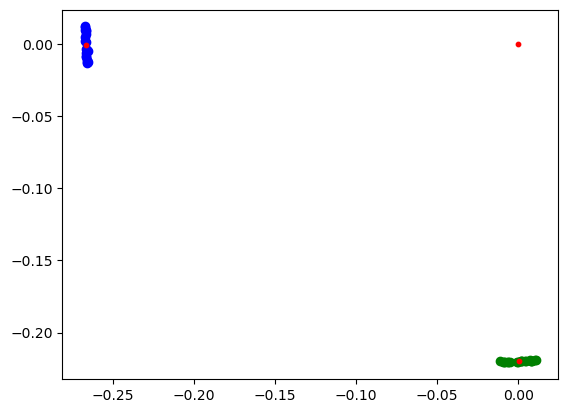

In [155]:
#Get lidar data in polar coordinates
filePath = '../TestData/17-june/test2/raw/a.csv'
lidarData = getLidarData(filePath)

#Get sud and east wall points
horizontalWallPolarPts  = findWallPoints(0,3,lidarData)
verticalWallPolarPts = findWallPoints(90,3,lidarData)

#Get wall points in cartesian coordinates
horizontalWallCartPts  = getCartesianCoordinates(horizontalWallPolarPts)
verticalWallCartPts = getCartesianCoordinates(verticalWallPolarPts)

horizontalWallCart = [horizontalWallCartPts[:,0].mean(), horizontalWallCartPts[:,1].mean()]
verticalWallCart = [verticalWallCartPts[:,0].mean(), verticalWallCartPts[:,1].mean()]

#plot wall points
plt.scatter(horizontalWallCartPts[:, 0], horizontalWallCartPts[:, 1], color='blue')
plt.scatter(verticalWallCartPts[:, 0], verticalWallCartPts[:, 1], color='green')
plt.scatter(horizontalWallCart[0], horizontalWallCart[1], s=10, color='red')
plt.scatter(verticalWallCart[0], verticalWallCart[1], s=10, color='red')
plt.scatter([0],[0], s=10, color='red')

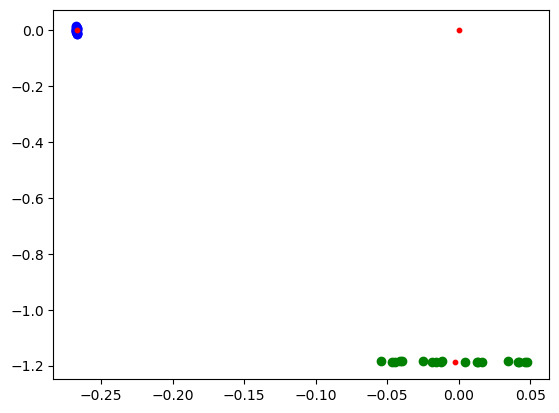

In [156]:
#Get lidar data in polar coordinates
filePath = '../TestData/17-june/test2/raw/b.csv'
lidarData = getLidarData(filePath)

#Get sud and east wall points
horizontalWallPolarPts  = findWallPoints(0,3,lidarData)
verticalWallPolarPts = findWallPoints(90,3,lidarData)

#Get wall points in cartesian coordinates
horizontalWallCartPts  = getCartesianCoordinates(horizontalWallPolarPts)
verticalWallCartPts = getCartesianCoordinates(verticalWallPolarPts)

horizontalWallCart = [horizontalWallCartPts[:,0].mean(), horizontalWallCartPts[:,1].mean()]
verticalWallCart = [verticalWallCartPts[:,0].mean(), verticalWallCartPts[:,1].mean()]

#plot wall points
plt.scatter(horizontalWallCartPts[:, 0], horizontalWallCartPts[:, 1], color='blue')
plt.scatter(verticalWallCartPts[:, 0], verticalWallCartPts[:, 1], color='green')
plt.scatter(horizontalWallCart[0], horizontalWallCart[1], s=10, color='red')
plt.scatter(verticalWallCart[0], verticalWallCart[1], s=10, color='red')
plt.scatter([0],[0], s=10, color='red')

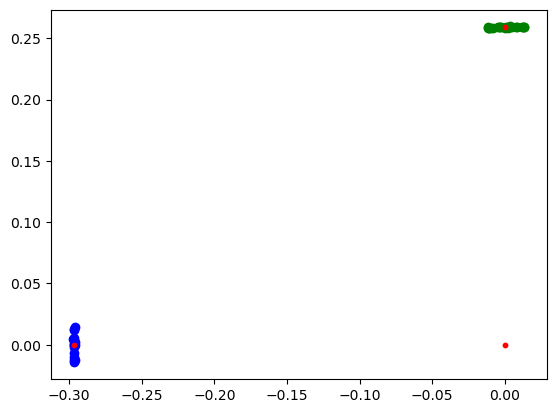

In [157]:
#Get lidar data in polar coordinates
filePath = '../TestData/17-june/test2/raw/c.csv'
lidarData = getLidarData(filePath)

#Get sud and west wall points
horizontalWallPolarPts  = findWallPoints(0,3,lidarData)
verticalWallPolarPts = findWallPoints(270,3,lidarData)

#Get wall points in cartesian coordinates
horizontalWallCartPts  = getCartesianCoordinates(horizontalWallPolarPts)
verticalWallCartPts = getCartesianCoordinates(verticalWallPolarPts)

horizontalWallCart = [horizontalWallCartPts[:,0].mean(), horizontalWallCartPts[:,1].mean()]
verticalWallCart = [verticalWallCartPts[:,0].mean(), verticalWallCartPts[:,1].mean()]

#plot wall points
plt.scatter(horizontalWallCartPts[:, 0], horizontalWallCartPts[:, 1], color='blue')
plt.scatter(verticalWallCartPts[:, 0], verticalWallCartPts[:, 1], color='green')
plt.scatter(horizontalWallCart[0], horizontalWallCart[1], s=10, color='red')
plt.scatter(verticalWallCart[0], verticalWallCart[1], s=10, color='red')
plt.scatter([0],[0], s=10, color='red')

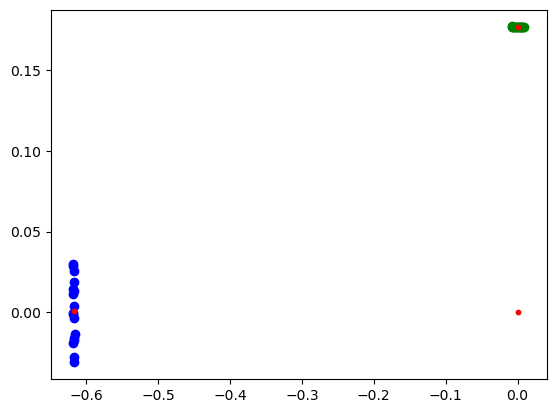

In [158]:
#Get lidar data in polar coordinates
filePath = '../TestData/17-june/test2/raw/d.csv'
lidarData = getLidarData(filePath)

#Get sud and west wall points
horizontalWallPolarPts  = findWallPoints(0,3,lidarData)
verticalWallPolarPts = findWallPoints(270,3,lidarData)

#Get wall points in cartesian coordinates
horizontalWallCartPts  = getCartesianCoordinates(horizontalWallPolarPts)
verticalWallCartPts = getCartesianCoordinates(verticalWallPolarPts)

horizontalWallCart = [horizontalWallCartPts[:,0].mean(), horizontalWallCartPts[:,1].mean()]
verticalWallCart = [verticalWallCartPts[:,0].mean(), verticalWallCartPts[:,1].mean()]

#plot wall points
plt.scatter(horizontalWallCartPts[:, 0], horizontalWallCartPts[:, 1], color='blue')
plt.scatter(verticalWallCartPts[:, 0], verticalWallCartPts[:, 1], color='green')
plt.scatter(horizontalWallCart[0], horizontalWallCart[1], s=10, color='red')
plt.scatter(verticalWallCart[0], verticalWallCart[1], s=10, color='red')
plt.scatter([0],[0], s=10, color='red')

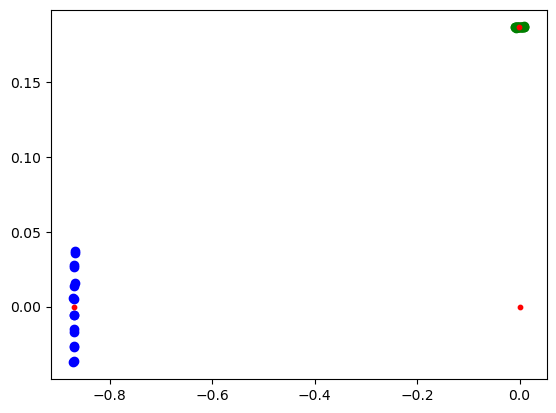

In [159]:
#Get lidar data in polar coordinates
filePath = '../TestData/17-june/test2/raw/e.csv'
lidarData = getLidarData(filePath)

#Get sud and west wall points
horizontalWallPolarPts  = findWallPoints(0,3,lidarData)
verticalWallPolarPts = findWallPoints(270,3,lidarData)

#Get wall points in cartesian coordinates
horizontalWallCartPts  = getCartesianCoordinates(horizontalWallPolarPts)
verticalWallCartPts = getCartesianCoordinates(verticalWallPolarPts)

horizontalWallCart = [horizontalWallCartPts[:,0].mean(), horizontalWallCartPts[:,1].mean()]
verticalWallCart = [verticalWallCartPts[:,0].mean(), verticalWallCartPts[:,1].mean()]

#plot wall points
plt.scatter(horizontalWallCartPts[:, 0], horizontalWallCartPts[:, 1], color='blue')
plt.scatter(verticalWallCartPts[:, 0], verticalWallCartPts[:, 1], color='green')
plt.scatter(horizontalWallCart[0], horizontalWallCart[1], s=10, color='red')
plt.scatter(verticalWallCart[0], verticalWallCart[1], s=10, color='red')
plt.scatter([0],[0], s=10, color='red')